In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from vega_datasets import data
import matplotlib.pyplot as plt


In [2]:
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


## Use the above dataset for the exercises below:

In [3]:
# Setting date column to datetime
df.date = pd.to_datetime(df.date)

In [4]:
# Setting the date as the index and sorting by date
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


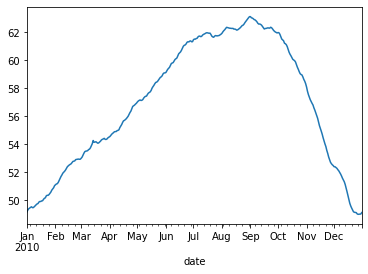

In [5]:
#Visualizing average temp over time
df.resample('D').temp.mean().plot()
plt.show()


### 2. Write the code necessary to visualize the minimum temperature over time.


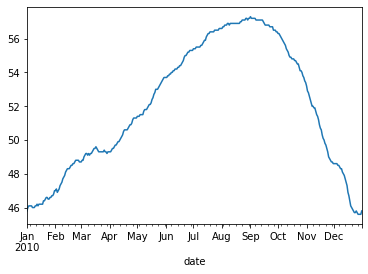

In [6]:
df.resample('D').temp.min().plot()
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.


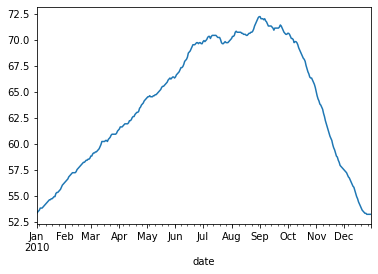

In [7]:
df.resample('D').temp.max().plot()
plt.show()

### 4. Which month is the coldest, on average?


In [8]:
df.resample('M').temp.min()

date
2010-01-31    45.8
2010-02-28    46.9
2010-03-31    48.7
2010-04-30    49.3
2010-05-31    51.4
2010-06-30    53.7
2010-07-31    55.4
2010-08-31    56.6
2010-09-30    56.4
2010-10-31    53.4
2010-11-30    48.6
2010-12-31    45.6
Freq: M, Name: temp, dtype: float64

December has the lowest average temperature w/ 45.6 degrees for the average.

<AxesSubplot:xlabel='date'>

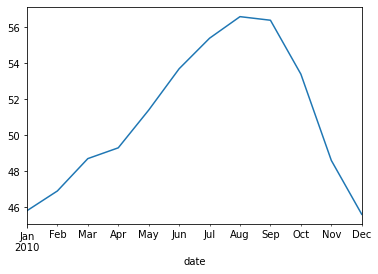

In [9]:
#Plotting lowest average temp for each month
df.resample('M').temp.min().plot()

### 5. Which month has the highest average temperature?


In [10]:
df.resample('M').temp.max()

date
2010-01-31    56.2
2010-02-28    58.6
2010-03-31    61.3
2010-04-30    64.3
2010-05-31    66.4
2010-06-30    69.7
2010-07-31    70.4
2010-08-31    72.2
2010-09-30    72.2
2010-10-31    70.6
2010-11-30    65.0
2010-12-31    57.5
Freq: M, Name: temp, dtype: float64

August and September share the highest average temperature

<AxesSubplot:xlabel='date'>

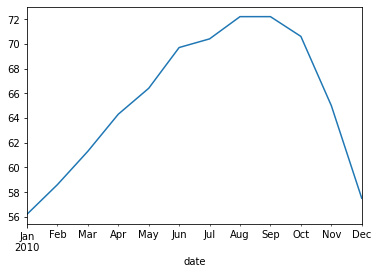

In [11]:
#Plotting lowest average temp for each month
df.resample('M').temp.max().plot()

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [12]:
df = df.resample('D').temp.agg(['min','max','mean'])

In [13]:
#Calculate the change
df['change'] = df['max'] - df['min']
df.head()

,min,max,mean,change
date,,,,
2010-01-01,45.8,53.3,49.170833,7.5
2010-01-02,46.0,53.4,49.304167,7.4
2010-01-03,46.1,53.5,49.391667,7.4
2010-01-04,46.1,53.6,49.445833,7.5
2010-01-05,46.1,53.8,49.491667,7.7


### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

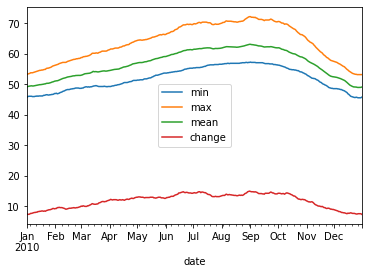

In [14]:
df.plot()

In [15]:
from vega_datasets import data
sew = data.seattle_weather()
sew.date = pd.to_datetime(sew.date)
sew = sew.set_index('date').sort_index()
sew = sew.rename(columns= {"precipitation" : "rain"})
sew.head()

,rain,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1 Which year and month combination has the highest amount of precipitation?


In [16]:
#Looking for highest value of rain
sew.resample('M').rain.sum().max()

284.5

In [17]:
#Take the index of the maximum value to find the month/year combination
sew.resample('M').rain.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [18]:
# Formating for readability
sew.resample('M').rain.sum().idxmax().strftime('%B, %Y')

'December, 2015'

### 2. Visualize the amount of monthly precipitation over time.


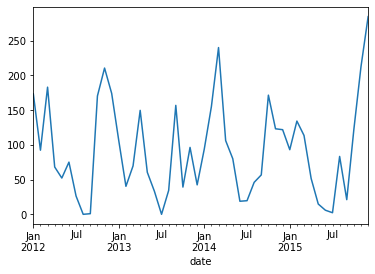

In [19]:
sew.resample('M').rain.sum().plot()
plt.show()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


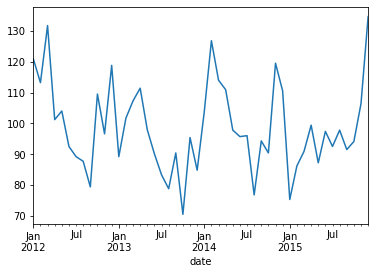

In [20]:
sew.resample('M').wind.sum().plot()
plt.show()


### 4. Which year-month combination is the windiest?


In [21]:
# Formating for readability
sew.resample('M').wind.sum().idxmax().strftime('%B, %Y')

'December, 2015'

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [22]:
sew.resample('Y').weather.value_counts()

date        weather
2012-12-31  rain       191
            sun        118
            drizzle     31
            snow        21
            fog          5
2013-12-31  sun        205
            fog         82
            rain        60
            drizzle     16
            snow         2
2014-12-31  sun        211
            fog        151
            rain         3
2015-12-31  sun        180
            fog        173
            drizzle      7
            rain         5
Name: weather, dtype: int64

2014 was the sunniest year.

### 6. In which month does it rain the most?


In [23]:
rain_by_month = pd.DataFrame(sew.resample('M').rain.sum())
rain_by_month.head()

,rain
date,
2012-01-31,173.3
2012-02-29,92.3
2012-03-31,183.0
2012-04-30,68.1
2012-05-31,52.2


In [24]:
rain_by_month['month'] = rain_by_month.index.strftime('%B')
rain_by_month.head()

,rain,month
date,,
2012-01-31,173.3,January
2012-02-29,92.3,February
2012-03-31,183.0,March
2012-04-30,68.1,April
2012-05-31,52.2,May


In [25]:
#Group by the month and take the average precipitation
rain_by_month.groupby('month').rain.mean()

month
April         93.850
August        40.925
December     155.675
February     105.500
January      116.500
July          12.050
June          33.225
March        151.550
May           51.875
November     160.625
October      125.850
September     58.875
Name: rain, dtype: float64

In [26]:
rain_by_month.groupby('month').rain.sum().idxmax()

'November'

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [28]:
#Create a new column that records whether or not it rained at all
sew['did_rain'] = np.where(sew['rain'] == 0, 0, 1)

In [ ]:
sew.head()

,rain,temp_max,temp_min,wind,weather,month,did_rain
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January,0
2012-01-02,10.9,10.6,2.8,4.5,rain,January,1
2012-01-03,0.8,11.7,7.2,2.3,rain,January,1
2012-01-04,20.3,12.2,5.6,4.7,rain,January,1
2012-01-05,1.3,8.9,2.8,6.1,rain,January,1


In [33]:
#Create a new df of the data resampled by month
did_rain_df = pd.DataFrame(sew.resample('M').did_rain.sum())
did_rain_df.head()

,did_rain
date,
2012-01-31,22
2012-02-29,19
2012-03-31,22
2012-04-30,17
2012-05-31,10


In [34]:
#Create a month column
did_rain_df['month'] = did_rain_df.index.strftime('%B')
did_rain_df.head()

,did_rain,month
date,,
2012-01-31,22,January
2012-02-29,19,February
2012-03-31,22,March
2012-04-30,17,April
2012-05-31,10,May


In [35]:
#Use idxmax to return the month
did_rain_df.groupby('month').did_rain.sum().idxmax()

'December'

# Flights data

In [37]:
flights = data.flights_20k()
flights.head()


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


### Correct all negative delays to 0

In [39]:
flights['delay'] = np.where(flights['delay'] < 0, 0, flights['delay'])
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


### Which hour of the day has the highest average delay?

In [41]:
#Make the date my index
flights = flights.set_index('date')
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [42]:
#Create an hour column
flights['hour'] = flights.index.strftime('%H')
flights.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [43]:
#Use idxmax to return the hour
flights.groupby('hour').delay.mean().idxmax()

'03'

### Does the day of the week make a difference in the delay amount?

In [45]:
#Create a new column for the day of the week
flights['day_of_week'] = flights.index.strftime('%A')
flights.head()

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [46]:
#Group by day of the week and take the mean of delay
flights.groupby('day_of_week').delay.mean()

day_of_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

### Does the month make a difference in the delay amount?

In [48]:
#Create a new column for the day of the week
flights['month'] = flights.index.strftime('%B')
flights.head()

,delay,distance,origin,destination,hour,day_of_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [49]:
#Group by day of the week and take the mean of delay
flights.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64